Minimal sample size per group for power >= 0.95 is: 27


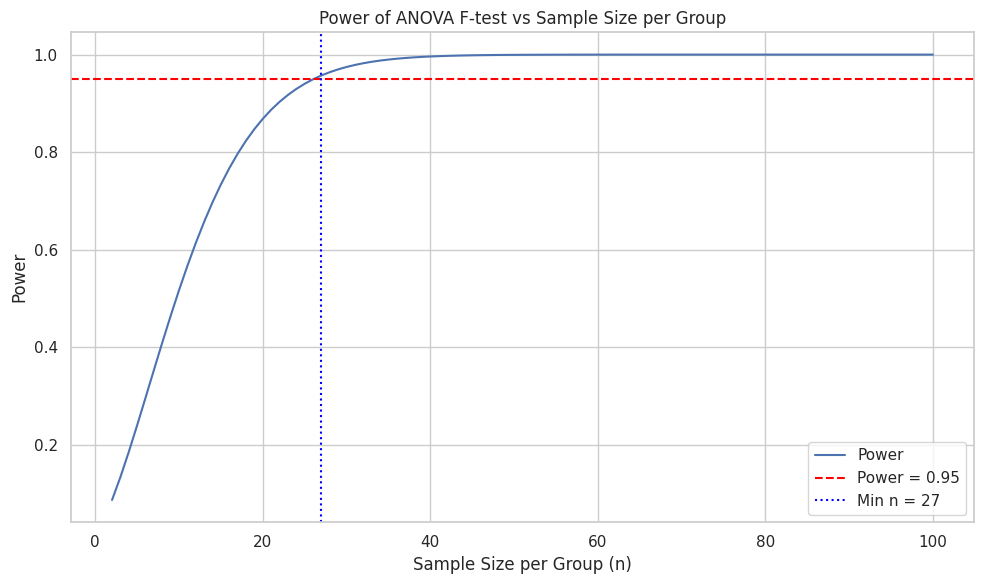

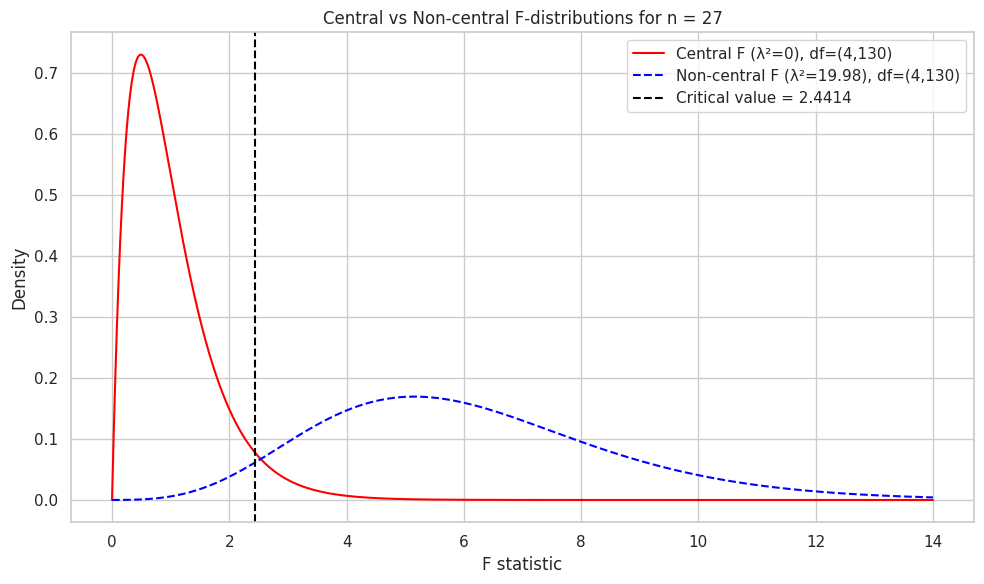

In [3]:
import numpy as np
from scipy.stats import f, ncf
import matplotlib.pyplot as plt
import seaborn as sns

k = 5
mus = np.array([1.5, 2, 1, -1.5, -3])
sigma = 5
alpha = 0.05

mu_bar = np.mean(mus)
ssd = np.sum((mus - mu_bar) ** 2)
df1 = k - 1

def power_calc(n):
    df2 = k * (n - 1)
    lambda2 = n * ssd / sigma**2
    F_crit = f.ppf(1 - alpha, df1, df2)
    power = 1 - ncf.cdf(F_crit, df1, df2, lambda2)
    return power, df2, lambda2, F_crit

n_values = np.arange(2, 101)
powers = []

for n in n_values:
    power, _, _, _ = power_calc(n)
    powers.append(power)

powers = np.array(powers)
n_min = n_values[np.where(powers >= 0.95)[0][0]]
print(f"Minimal sample size per group for power >= 0.95 is: {n_min}")

# Plot power curve
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(n_values, powers, label="Power")
plt.axhline(0.95, color='red', linestyle='--', label='Power = 0.95')
plt.axvline(n_min, color='blue', linestyle=':', label=f"Min n = {n_min}")
plt.xlabel("Sample Size per Group (n)")
plt.ylabel("Power")
plt.title("Power of ANOVA F-test vs Sample Size per Group")
plt.legend()
plt.tight_layout()
plt.show()

# Plot F distributions for n_min
_, df2_min, lambda2_min, F_crit_min = power_calc(n_min)
x = np.linspace(0, 14, 1000)
f_central = f.pdf(x, df1, df2_min)
f_noncentral = ncf.pdf(x, df1, df2_min, lambda2_min)

plt.figure(figsize=(10, 6))
plt.plot(x, f_central, color='red', linestyle='-', label=f"Central F (λ²=0), df=({df1},{df2_min})")
plt.plot(x, f_noncentral, color='blue', linestyle='--', label=f"Non-central F (λ²={lambda2_min:.2f}), df=({df1},{df2_min})")
plt.axvline(F_crit_min, color='black', linestyle='dashed', label=f"Critical value = {F_crit_min:.4f}")
plt.xlabel("F statistic")
plt.ylabel("Density")
plt.title(f"Central vs Non-central F-distributions for n = {n_min}")
plt.legend()
plt.tight_layout()
plt.show()


==== RESULTS ====
Group means: [ 1.5  2.   1.  -1.5 -3. ]
Overall mean: 0.0
Sum of squared deviations: 18.5000
Non-centrality parameter: lambda²(n) = 0.7400 * n
Minimum sample size per group for power ≥ 0.95: n = 27
Critical F value (alpha = 0.05): 2.4414
Degrees of freedom: df1 = 4, df2 = 130
Non-centrality parameter at n=27: lambda² = 19.9800
Power at n=27: 0.9573


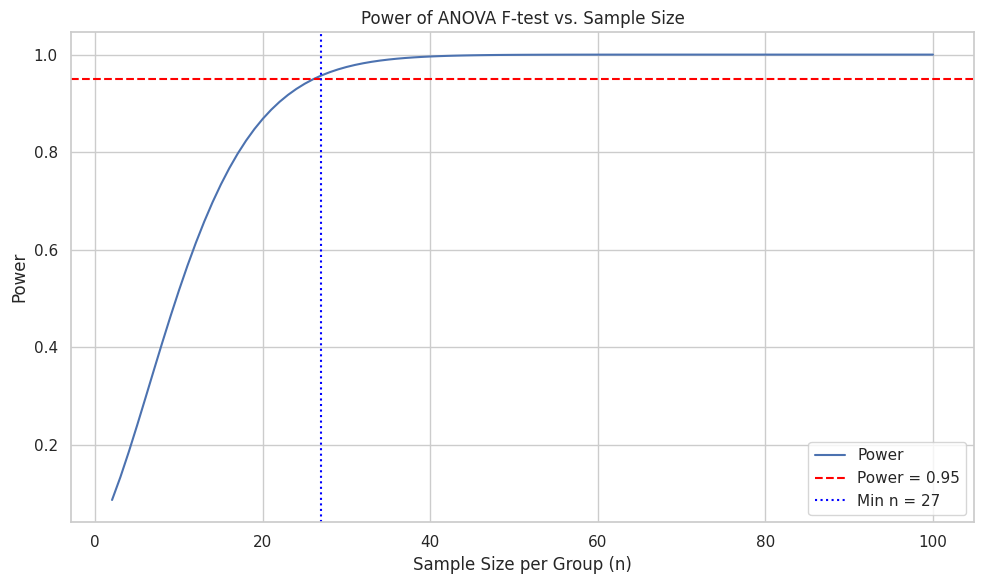

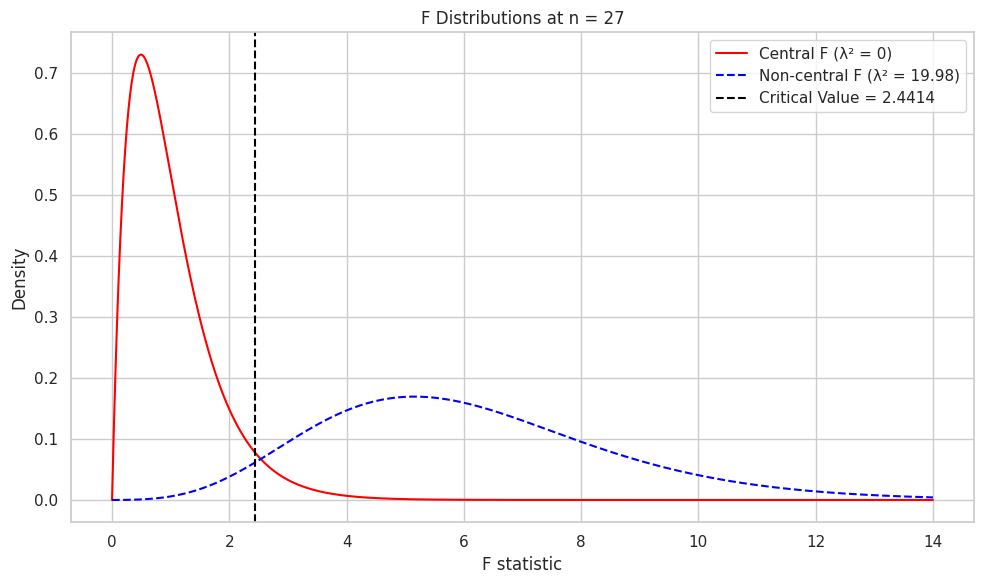

In [4]:
import numpy as np
from scipy.stats import f, ncf
import matplotlib.pyplot as plt
import seaborn as sns

# === Parameters ===
k = 5  # Number of groups
alpha = 0.05  # Significance level
sigma = 5  # Standard deviation

# Group means
mu = np.array([1.5, 2, 1, -1.5, -3])
mu_bar = np.mean(mu)

# Sum of squared deviations
ssd = np.sum((mu - mu_bar) ** 2)

# Numerator degrees of freedom
df1 = k - 1

# Power calculation function
def power_anova(n):
    df2 = k * (n - 1)
    lambda2 = n * ssd / sigma**2
    F_crit = f.ppf(1 - alpha, df1, df2)
    power = 1 - ncf.cdf(F_crit, df1, df2, lambda2)
    return power, df2, lambda2, F_crit

# === Step: Loop over sample sizes to find minimum n for power >= 0.95 ===
n_values = np.arange(2, 101)
powers = []

for n in n_values:
    power, _, _, _ = power_anova(n)
    powers.append(power)

powers = np.array(powers)
n_min = n_values[np.where(powers >= 0.95)[0][0]]
power_at_n_min, df2_min, lambda2_min, F_crit_min = power_anova(n_min)

# === Print Results ===
print("==== RESULTS ====")
print(f"Group means: {mu}")
print(f"Overall mean: {mu_bar}")
print(f"Sum of squared deviations: {ssd:.4f}")
print(f"Non-centrality parameter: lambda²(n) = {ssd / sigma**2:.4f} * n")
print(f"Minimum sample size per group for power ≥ 0.95: n = {n_min}")
print(f"Critical F value (alpha = 0.05): {F_crit_min:.4f}")
print(f"Degrees of freedom: df1 = {df1}, df2 = {df2_min}")
print(f"Non-centrality parameter at n={n_min}: lambda² = {lambda2_min:.4f}")
print(f"Power at n={n_min}: {power_at_n_min:.4f}")

# === Plot: Power vs Sample Size ===
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(n_values, powers, label="Power")
plt.axhline(0.95, color='red', linestyle='--', label='Power = 0.95')
plt.axvline(n_min, color='blue', linestyle=':', label=f"Min n = {n_min}")
plt.xlabel("Sample Size per Group (n)")
plt.ylabel("Power")
plt.title("Power of ANOVA F-test vs. Sample Size")
plt.legend()
plt.tight_layout()
plt.show()

# === Plot: F distributions at n_min ===
x = np.linspace(0, 14, 1000)
f_central = f.pdf(x, df1, df2_min)
f_noncentral = ncf.pdf(x, df1, df2_min, lambda2_min)

plt.figure(figsize=(10, 6))
plt.plot(x, f_central, color='red', label='Central F (λ² = 0)', linestyle='-')
plt.plot(x, f_noncentral, color='blue', label=f'Non-central F (λ² = {lambda2_min:.2f})', linestyle='--')
plt.axvline(F_crit_min, color='black', linestyle='dashed', label=f'Critical Value = {F_crit_min:.4f}')
plt.xlabel("F statistic")
plt.ylabel("Density")
plt.title(f"F Distributions at n = {n_min}")
plt.legend()
plt.tight_layout()
plt.show()


Minimal sample size per group for power >= 0.95 is: 27


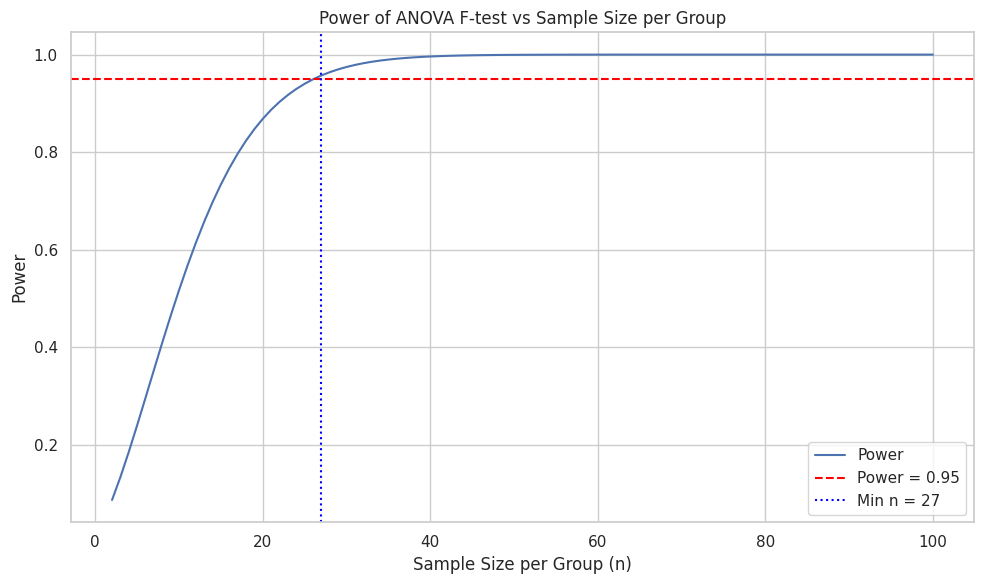

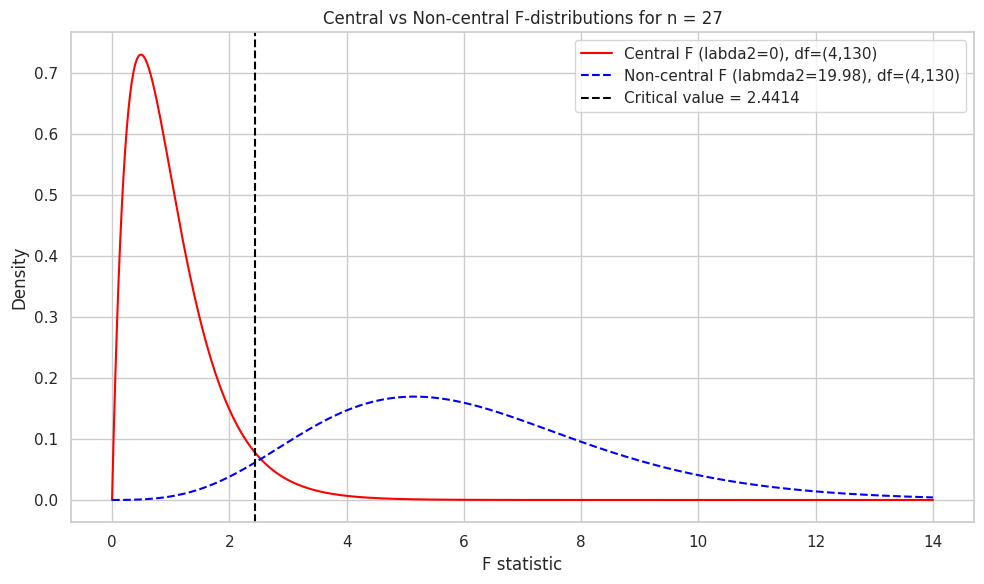

In [5]:
import numpy as np
from scipy.stats import f, ncf
import matplotlib.pyplot as plt
import seaborn as sns

k = 5
mus = np.array([1.5, 2, 1, -1.5, -3])
sigma = 5
alpha = 0.05

mu_bar = np.mean(mus)
ssd = np.sum((mus - mu_bar) ** 2)
df1 = k - 1

def power_calc(n):
    df2 = k * (n - 1)
    lambda2 = n * ssd / sigma**2
    F_crit = f.ppf(1 - alpha, df1, df2)
    power = 1 - ncf.cdf(F_crit, df1, df2, lambda2)
    return power, df2, lambda2, F_crit

n_values = np.arange(2, 101)
powers = []

for n in n_values:
    power, _, _, _ = power_calc(n)
    powers.append(power)

powers = np.array(powers)
n_min = n_values[np.where(powers >= 0.95)[0][0]]
print(f"Minimal sample size per group for power >= 0.95 is: {n_min}")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(n_values, powers, label="Power")
plt.axhline(0.95, color='red', linestyle='--', label='Power = 0.95')
plt.axvline(n_min, color='blue', linestyle=':', label=f"Min n = {n_min}")
plt.xlabel("Sample Size per Group (n)")
plt.ylabel("Power")
plt.title("Power of ANOVA F-test vs Sample Size per Group")
plt.legend()
plt.tight_layout()
plt.show()

_, df2_min, lambda2_min, F_crit_min = power_calc(n_min)
x = np.linspace(0, 14, 1000)
f_central = f.pdf(x, df1, df2_min)
f_noncentral = ncf.pdf(x, df1, df2_min, lambda2_min)

plt.figure(figsize=(10, 6))
plt.plot(x, f_central, color='red', linestyle='-', label=f"Central F (labda2=0), df=({df1},{df2_min})")
plt.plot(x, f_noncentral, color='blue', linestyle='--', label=f"Non-central F (labmda2={lambda2_min:.2f}), df=({df1},{df2_min})")
plt.axvline(F_crit_min, color='black', linestyle='dashed', label=f"Critical value = {F_crit_min:.4f}")
plt.xlabel("F statistic")
plt.ylabel("Density")
plt.title(f"Central vs Non-central F-distributions for n = {n_min}")
plt.legend()
plt.tight_layout()
plt.show()
